In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Squid%20Game%20IMDB%20User%20Reviews/reviews.csv")

In [15]:
df.head()

,Unnamed: 0,User_name,Review title,Review Rating,Review date,Review_body
0,0,Leofwine_draca,A new TV classic,10/10,9 October 2021,"Just finished up SQUID GAME, the Korean TV sho..."
1,1,kosmasp,Just a game,9/10,10 October 2021,"Well multiple games actually, but even that yo..."
2,2,Tweekums,Games to die for,10/10,11 October 2021,This runaway hit from South Korea is centred o...
3,3,FeastMode,"if you think this is good, PLEASE watch the ko...",5/10,9 October 2021,I went into this show knowing absolutely nothi...
4,4,Irishchatter,It started off strong but ended disoriented,7/10,8 October 2021,I honestly don't know wtf the main character n...


In [16]:
df.shape

(1185, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1185 non-null   int64 
 1   User_name      1185 non-null   object
 2   Review title   1185 non-null   object
 3   Review Rating  1185 non-null   object
 4   Review date    1185 non-null   object
 5   Review_body    1185 non-null   object
dtypes: int64(1), object(5)
memory usage: 55.7+ KB


In [18]:
df['Rating']=df['Review Rating'].apply(lambda x:str(x).split('/')[0])
df['Rating']=df['Rating'].apply(lambda x:int(x))
def rep(r):
    if r>=8:
        return 'Good'
    if r==6 or r==7:
        return 'Average'
    if r==4 or r==5:
        return 'Below Average'
    else:
        return 'Poor'
df['Review']=df['Rating'].apply(rep)
df['Review']

0                Good
1                Good
2                Good
3       Below Average
4             Average
            ...      
1180          Average
1181             Good
1182             Good
1183             Good
1184             Good
Name: Review, Length: 1185, dtype: object

<AxesSubplot:xlabel='Review', ylabel='count'>

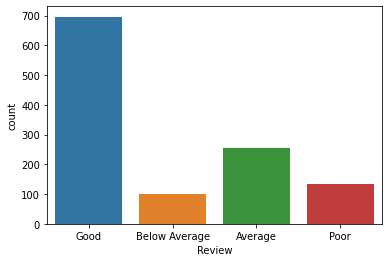

In [19]:
df['Review Body']=df['Review title']+' '+df['Review_body']
sns.countplot(df['Review'])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df['Review Body'])
cv.vocabulary_

{'new': 4561,
 'tv': 6989,
 'classic': 1248,
 'just': 3843,
 'finished': 2761,
 'squid': 6321,
 'game': 2951,
 'korean': 3918,
 'global': 3034,
 'smash': 6167,
 'hit': 3347,
 'netflix': 4557,
 'truly': 6967,
 'brilliant': 934,
 'better': 760,
 'similar': 6083,
 'japanese': 3791,
 'alice': 367,
 'borderland': 874,
 'centred': 1118,
 'contestants': 1498,
 'competing': 1387,
 'children': 1201,
 'games': 2954,
 'cash': 1080,
 'prize': 5220,
 'twist': 6995,
 'killed': 3882,
 'lose': 4126,
 'shades': 5989,
 'saw': 5826,
 'hunger': 3443,
 'rivalled': 5710,
 'battle': 691,
 'royale': 5752,
 'terms': 6731,
 'sheer': 6011,
 'quality': 5351,
 'usual': 7199,
 'korea': 3917,
 'writing': 7549,
 'acting': 259,
 'direction': 1988,
 'superb': 6554,
 'hugely': 3427,
 'suspenseful': 6603,
 'unlike': 7125,
 've': 7225,
 'seen': 5914,
 'definitely': 1812,
 'horrifying': 3402,
 'premise': 5177,
 'violent': 7278,
 'bloodshed': 827,
 'count': 1571,
 'horror': 3403,
 '67': 165,
 '144': 36,
 'helpful': 3298,
 '